In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)
d = stats.norm.rvs(loc = 3, scale = 0.01, size = 100000)

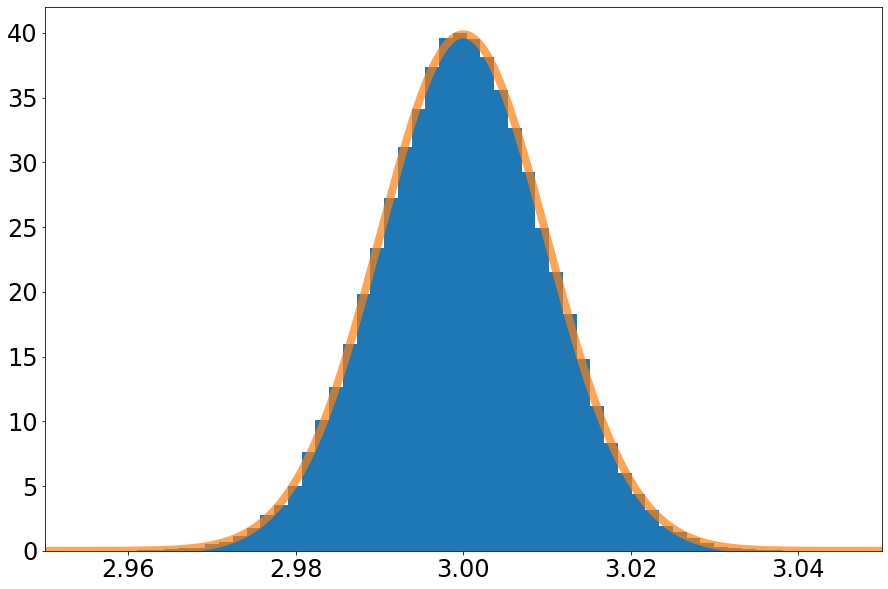

In [4]:
fig, ax = plt.subplots(1,1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize=24)
plt.xlim(2.95, 3.05)
x = np.linspace(2.95, 3.05, 1000)
ax.plot(x, stats.norm.pdf(x, loc=3,scale=0.01), linewidth = 8, alpha = 0.7)

In [5]:
def sigma_to_prob(sigma: float, mean=0., stdev=1.):
    return stats.norm.cdf(sigma, loc=mean, scale=stdev)

In [25]:
for x in range(-4, 5, 1):
    print('sigma: {} probability: {:.3f}'.format(x,sigma_to_prob(x)))

sigma: -4 probability: 0.000
sigma: -3 probability: 0.001
sigma: -2 probability: 0.023
sigma: -1 probability: 0.159
sigma: 0 probability: 0.500
sigma: 1 probability: 0.841
sigma: 2 probability: 0.977
sigma: 3 probability: 0.999
sigma: 4 probability: 1.000


In [7]:
def prob_to_sigma(prob: float, mean=0., stdev=1.):
    return stats.norm.ppf(prob, loc=mean, scale=stdev)

In [8]:
probs = np.linspace(0, 1, 9)
for x in probs:
    print('probability: {:.3f} sigma: {:.3f}'.format(x,prob_to_sigma(x)))

probability: 0.000 sigma: -inf
probability: 0.125 sigma: -1.150
probability: 0.250 sigma: -0.674
probability: 0.375 sigma: -0.319
probability: 0.500 sigma: 0.000
probability: 0.625 sigma: 0.319
probability: 0.750 sigma: 0.674
probability: 0.875 sigma: 1.150
probability: 1.000 sigma: inf


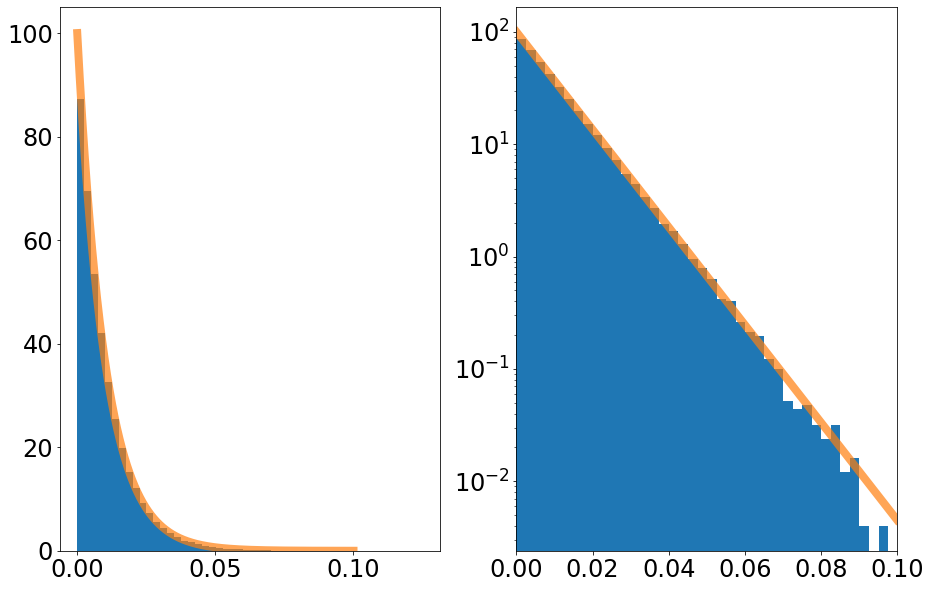

In [23]:
d = stats.expon.rvs(loc = 0, scale = 0.01, size = 100000)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(d, 50, density=True)
ax1.tick_params(labelsize=24)
plt.xlim(0, .1)
x = np.linspace(0, .1, 1000)
ax1.plot(x, stats.expon.pdf(x, loc=0,scale=0.01), linewidth = 8, alpha = 0.7)
ax2.set_yscale('log')
ax2.tick_params(labelsize=24)
ax2.hist(d, 50, density=True)
ax2.plot(x, stats.expon.pdf(x, loc=0,scale=0.01), linewidth = 8, alpha = 0.7)

In [10]:
# Signal is 0.04. What is the probability that our signal candidate at 0.04 is not background noise?

In [11]:
prob = stats.expon.cdf(0.04, loc=0, scale=0.01)
print(prob)
signal_sigma = prob_to_sigma(prob)
signal_sigma

0.9816843611112658


2.0898499829712565

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


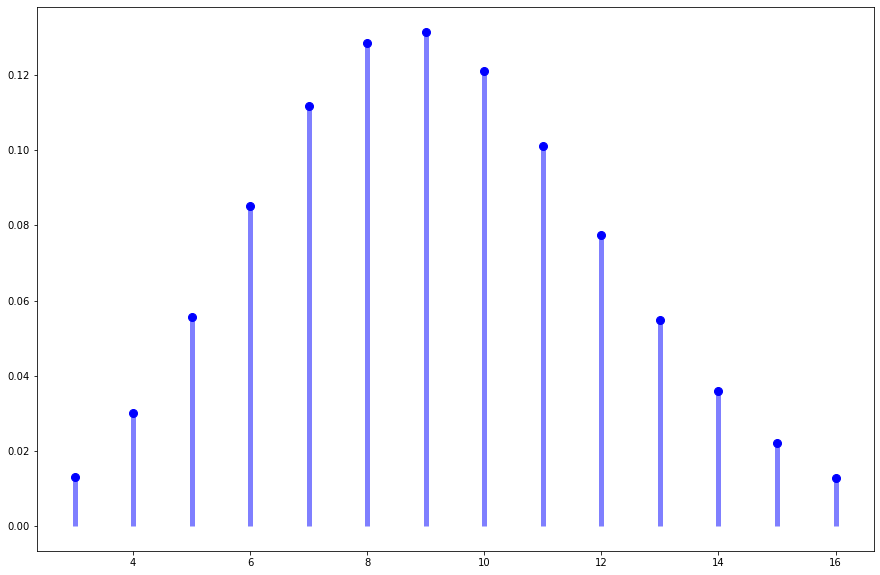

In [28]:
# DO NOT USE: DOCUMENTATION
fig, ax = plt.subplots(1,1)
mu = 9.2
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
print(x)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

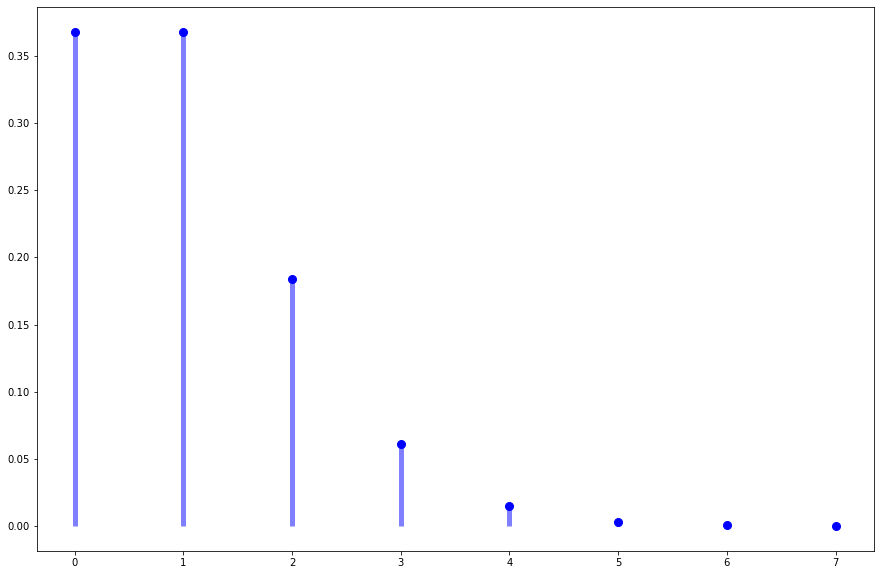

In [38]:
fig, ax = plt.subplots(1,1)
mu = 1
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99999, mu))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [34]:
# For poisson distributions, they predict the probability of independently probable events occurring a certain amount of times within a given timeframe. This is why the
# distribution is non-continuous, as an event cannot occur a non-integer number of times. The lone parameter mu describes both the mean and variance of the distrubtion,
# while a location parameter can be added to shift the distribution to a specific position.

# For the above distribution, what is the probability that a signal candidate at three events is not background?

prob = stats.poisson.cdf(4, 1)
sigma = prob_to_sigma(prob)
print(prob, sigma)

0.9963401531726563 2.6819384005470015


In [ ]:
# The implications of this type of distribution of experiments means that there are only a certain number of specific outcomes that one can record. For example, using the distrubtion above,
# if the "signal" you're looking for means an event occurs four times, there is only one associated sigma, and without making changes to the experiment your results cannot realistically 
# be further improved upon.

# While the outcomes must be discrete, the parameters of the distribution are not necessarily discrete. The mean and variance for example, change continuously as data is collected and added
# to the distribution. This is continuous in the same way as taking the mean of a set of integers is not necessarily an integer but rather tells you the average of this set.